I began my program by loading in all of the packages that I will need for the entire assignment

In [1]:
library(caret)
library(ggplot2)
library(rpart)
library(rattle)
library(e1071)

Loading required package: lattice
Loading required package: ggplot2
Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


Import the adult data set to Rstudio setting the header = FALSE so that the first rows does not turn in to variable names.  

In [2]:
df = read.csv('adult.csv', header = FALSE)

Change the variables' names to the appropriate ones.  I used function names(df) to access the variables names.

In [3]:
names(df)[1]='age'
names(df)[2]='workclass'
names(df)[3]='fnlwgt'
names(df)[4]='education'
names(df)[5]='education_num'
names(df)[6]='marital_status'
names(df)[7]='occupation'
names(df)[8]='relationship'
names(df)[9]='race'
names(df)[10]='sex'
names(df)[11]='capital_gain'
names(df)[12]='capital_loss'
names(df)[13]='hours_per_week'
names(df)[14]='native_country'
names(df)[15]='target'
names(df)

[1] "age"            "workclass"      "fnlwgt"         "education"     
 [5] "education_num"  "marital_status" "occupation"     "relationship"  
 [9] "race"           "sex"            "capital_gain"   "capital_loss"  
[13] "hours_per_week" "native_country" "target"

Identify all the missing values.  Notice that missing values can be in the form of "NA", "?", "." and so on 

In [4]:
str(df)
df[df==' ?']=NA

'data.frame':	32561 obs. of  15 variables:
 $ age           : int  39 50 38 53 28 37 49 52 31 42 ...
 $ workclass     : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ fnlwgt        : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ education     : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ education_num : int  13 13 9 7 13 14 5 9 14 13 ...
 $ marital_status: Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ occupation    : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ relationship  : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ race          : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex           : Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ capital_gain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capital_loss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ hours_per_we

Replacing numeric missing values by the mean of the corresponding variables, and categorical missing values by the mode of the corresponding variables. 

In [5]:
mode=function(x) {
  levels=unique(x)
  return(levels[which.max(tabulate(match(x, levels)))])
}
num_miss=preProcess(df, method='medianImpute')
df=predict(num_miss, newdata = df)
df[is.na(df$workclass),]$workclass=mode(df$workclass)
df[is.na(df$occupation),]$occupation=mode(df$occupation)
df[is.na(df$native_country),]$native_country=mode(df$native_country)
sum(is.na(df))

[1] 0

Performed data visualization on the data, includning:
-	Bar charts of two categorical variables
-	Density curves of numeric variables on the categories of categorical variables.  For example: plotting density curves of Age on female and male.

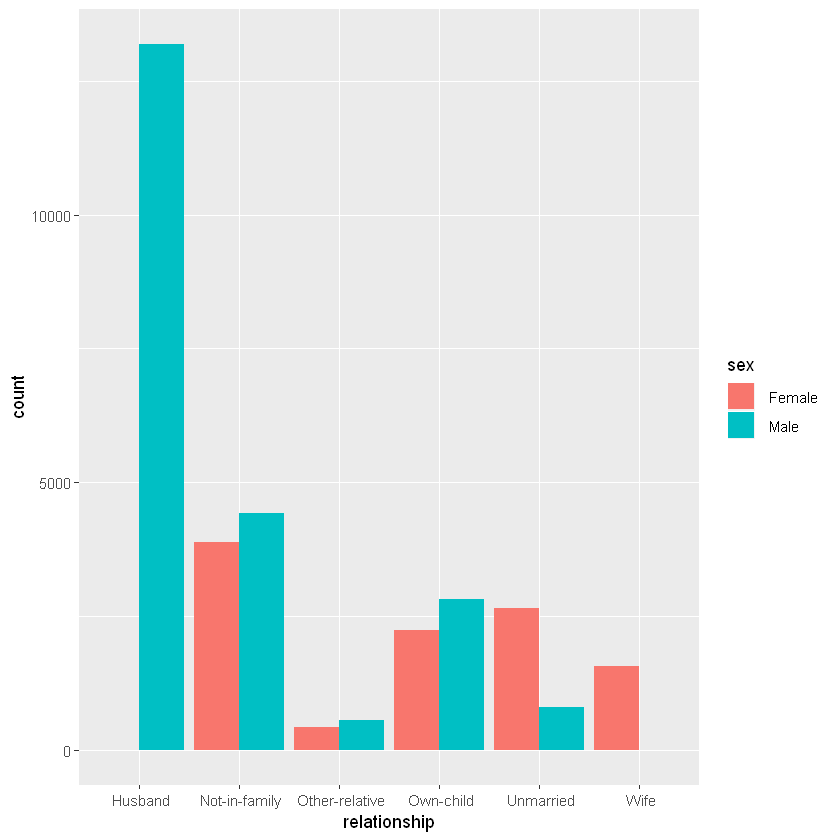

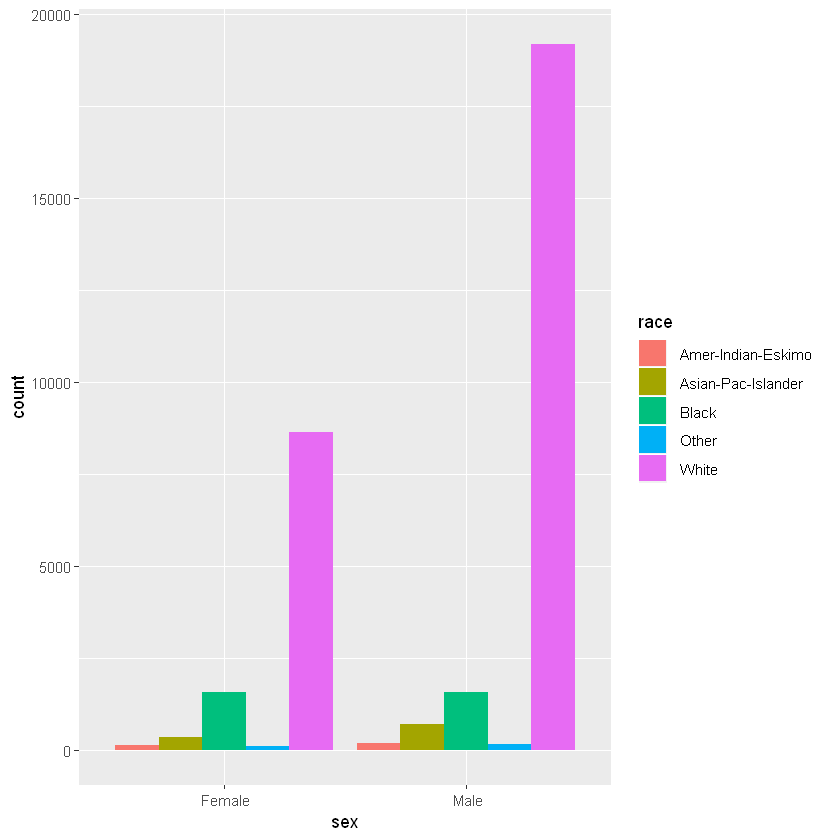

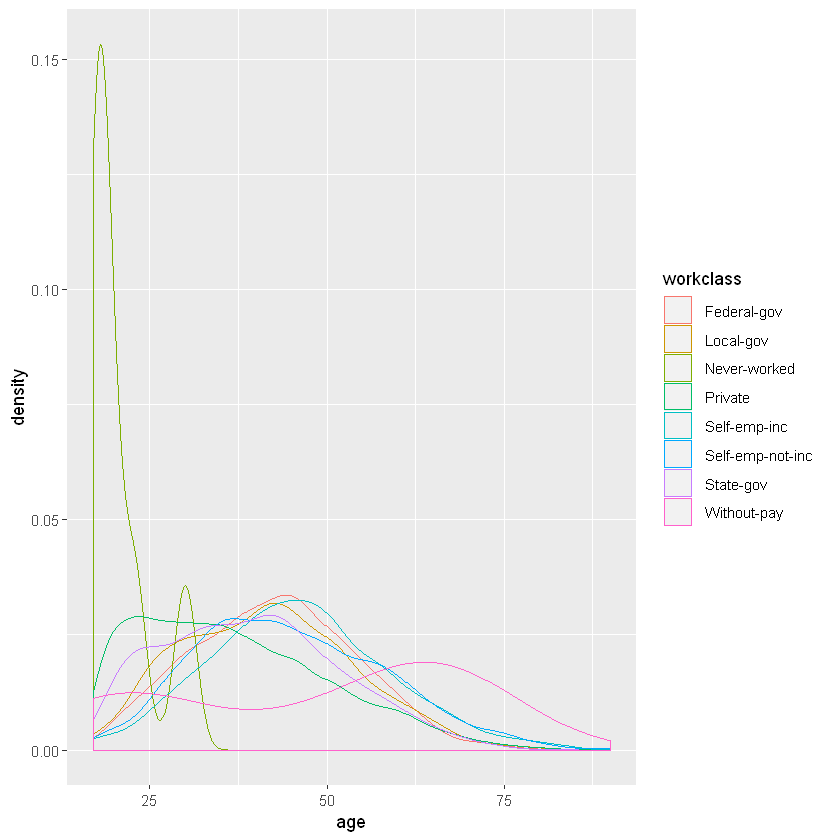

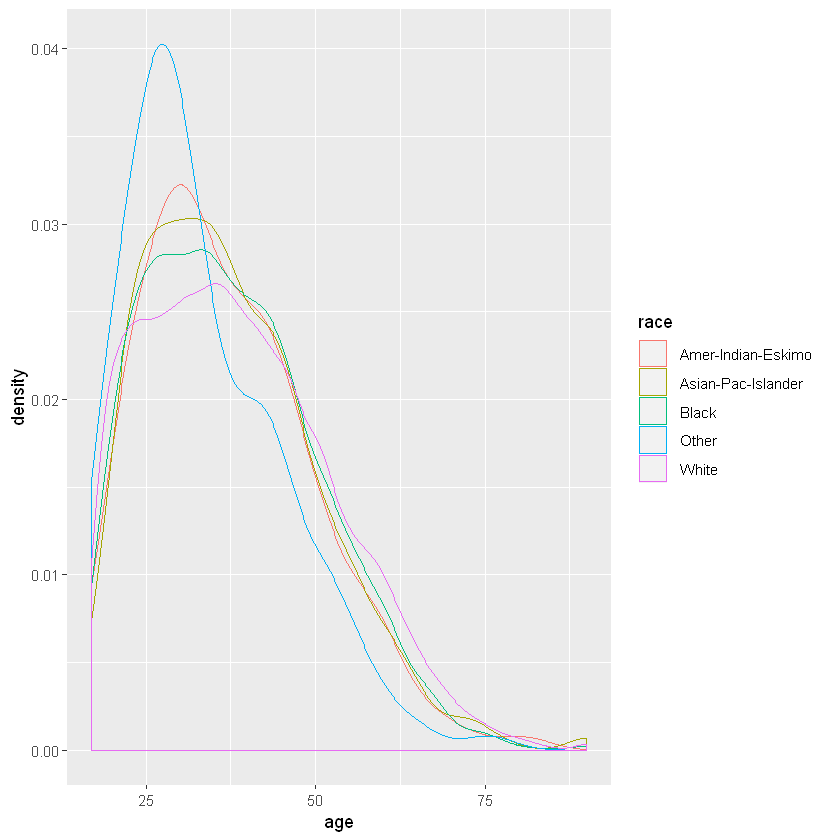

In [6]:
ggplot(data=df)+geom_bar(mapping=aes(x=relationship,fill=sex),position="dodge")
ggplot(data=df)+geom_bar(mapping=aes(x=sex,fill=race),position="dodge")
ggplot(data=df)+geom_density(mapping=aes(x=age, color=workclass))
ggplot(data=df)+geom_density(mapping=aes(x=age, color=race))

Partition the data into training and testing data with ratio train : test = 60 : 40

In [7]:
split=createDataPartition(df$target, p=.60, list=FALSE, times=1)
train=df[split,]
test=df[-split,]

Build a decision tree model on the training data and test the model on the testing data

In [8]:
mytree=rpart(target ~., data=train, method="class")
pred=predict(mytree,test,type="class")

Report the misclassification rate and confusion table of the tree model

In [9]:
cm=confusionMatrix(data=pred ,reference=test$target, positive=" >50K")
cm

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9402  1528
     >50K     486  1608
                                         
               Accuracy : 0.8454         
                 95% CI : (0.839, 0.8515)
    No Information Rate : 0.7592         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.5229         
 Mcnemar's Test P-Value : < 2.2e-16      
                                         
            Sensitivity : 0.5128         
            Specificity : 0.9508         
         Pos Pred Value : 0.7679         
         Neg Pred Value : 0.8602         
             Prevalence : 0.2408         
         Detection Rate : 0.1235         
   Detection Prevalence : 0.1608         
      Balanced Accuracy : 0.7318         
                                         
       'Positive' Class :  >50K          
                                         

Print out the tree

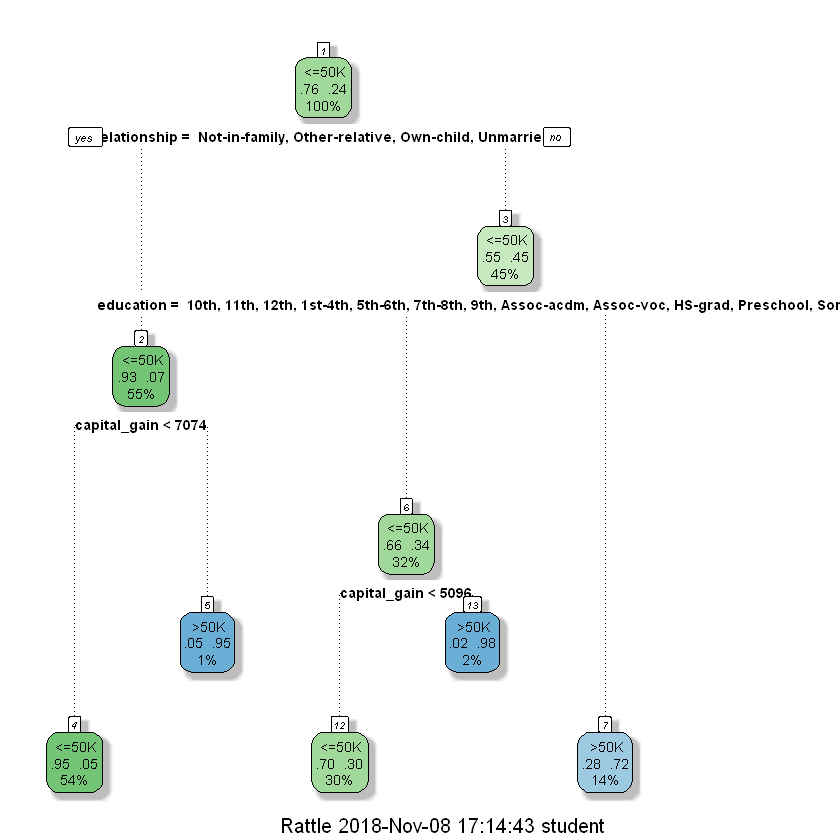

In [10]:
fancyRpartPlot(mytree)

Build tree model using caret package and report the confusion table

In [12]:
model=train(target~.,data=train,method="rpart")
pred=predict(model,test)
cm2=confusionMatrix(pred,test$target, positive=" >50K")
cm2

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9388  1647
     >50K     500  1489
                                          
               Accuracy : 0.8352          
                 95% CI : (0.8287, 0.8415)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4848          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4748          
            Specificity : 0.9494          
         Pos Pred Value : 0.7486          
         Neg Pred Value : 0.8507          
             Prevalence : 0.2408          
         Detection Rate : 0.1143          
   Detection Prevalence : 0.1527          
      Balanced Accuracy : 0.7121          
                                          
       'Positive' Class :  >50K           
                                          

Write a function, taking the input of training data percentage, to automate 7-10.  Apply the function with training data = 70%; 80%; 90%

In [ ]:
tree_train=function(x){
  library(caret)
  library(e1071)
  library(rattle)
  split=createDataPartition(df$target, p=x, list=FALSE, times=1)
  train=df[split,]
  test=df[-split,]
  model=train(target~.,data=train,method="rpart")
  pred=predict(model,test)
  cm=confusionMatrix(pred,test$target, positive=" >50K")
  print(cm)
  fancyRpartPlot(model$finalModel)

}
tree_train(.70)
tree_train(.80)
tree_train(.90)

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7074  1204
     >50K     342  1148
                                          
               Accuracy : 0.8417          
                 95% CI : (0.8343, 0.8489)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5052          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4881          
            Specificity : 0.9539          
         Pos Pred Value : 0.7705          
         Neg Pred Value : 0.8546          
             Prevalence : 0.2408          
         Detection Rate : 0.1175          
   Detection Prevalence : 0.1525          
      Balanced Accuracy : 0.7210          
                                          
       'Positive' Class :  >50K           
                                          
